In [1]:
# Import packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
# # Import/preview train data

train_df = pd.read_csv('train.csv')
train_df

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [3]:
# Import/preview test data

test_df = pd.read_csv('test.csv')
test_df

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,test_199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,...,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,test_199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,...,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740,-20.7689
199997,test_199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,1.6603,...,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,9.1933,11.7905,-22.2762
199998,test_199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,...,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735,-0.2122


In [4]:
# Check for null entries in train

train_df.isnull().sum().sum()

0

In [5]:
# Check for null entries in train

test_df.isnull().sum().sum()

0

In [58]:
# Check abs value of correlations between features and 'target'

corr_df = train_df.corrwith(train_df['target']).reset_index()
corr_df = corr_df.rename({'index':'feature',0:'corr'},axis=1)
corr_df['corr'] = abs(corr_df['corr'])
corr_df = corr_df.sort_values(by='corr',ascending=False)

corr_df.head(25)

,feature,corr
0,target,1.000000
82,var_81,0.080917
140,var_139,0.074080
13,var_12,0.069489
7,var_6,0.066731
111,var_110,0.064275
147,var_146,0.063644
54,var_53,0.063399
27,var_26,0.062422
77,var_76,0.061917


In [9]:
# Not many strong correlations above
# Let's engineer some basic features based on our columns

%%time

idx = train_df.columns.values[2:]

for df in [train_df]:
    df['sum'] = df[idx].sum(axis=1)  
    df['min'] = df[idx].min(axis=1)
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
    df['kurt'] = df[idx].kurtosis(axis=1)
    df['med'] = df[idx].median(axis=1)
    
idx = test_df.columns.values[1:]
    
for df in [test_df]:
    df['sum'] = df[idx].sum(axis=1)  
    df['min'] = df[idx].min(axis=1)
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
    df['kurt'] = df[idx].kurtosis(axis=1)
    df['med'] = df[idx].median(axis=1)
    
train_df

CPU times: total: 8.25 s
Wall time: 8.3 s


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_198,var_199,sum,min,max,mean,std,skew,kurt,med
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,12.7803,-1.0914,1456.3182,-21.4494,43.1127,7.281591,9.331540,0.101580,1.331023,6.77040
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,18.3560,1.9518,1415.3636,-47.3797,40.5632,7.076818,10.336130,-0.351734,4.110215,7.22315
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,14.7222,0.3965,1240.8966,-22.4038,33.8820,6.204483,8.753387,-0.056957,0.546438,5.89940
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,17.9697,-8.9996,1288.2319,-35.1659,38.1015,6.441159,9.594064,-0.480116,2.630499,6.70260
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,17.9974,-8.8104,1354.2310,-65.4863,41.1037,6.771155,11.287122,-1.463426,9.787399,6.94735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,16.6660,-17.8661,1349.0825,-23.6064,35.4923,6.745412,9.568606,-0.048360,0.815615,6.41060
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,15.9054,0.3388,1350.6997,-39.6406,38.8105,6.753499,10.308092,-0.553757,2.620481,6.57875
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,13.8329,4.1995,1374.9384,-49.5007,43.0307,6.874692,9.821335,-0.750798,5.837304,6.40910
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,15.5289,-13.9001,1388.1757,-42.9704,46.4915,6.940879,10.989741,-0.175745,3.526916,6.69070


In [31]:
# Define our target/features

features = [c for c in train_df.columns if c not in ['ID_code', 'target']]
target = train_df['target']

In [32]:
# Define params for our model

param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.4,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.05,
    'learning_rate': 0.01,
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1
}

In [38]:
# Train model using lightgbm and k-fold cross-validation

from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, roc_curve

folds = StratifiedKFold(n_splits=10)
oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 1000000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 3000)
    oof[val_idx] = clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

Fold 0
[LightGBM] [Info] Number of positive: 18089, number of negative: 161911
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.167005 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 53040
[LightGBM] [Info] Number of data points in the train set: 180000, number of used features: 208
Training until validation scores don't improve for 3000 rounds
[1000]	training's auc: 0.887143	valid_1's auc: 0.867542
[2000]	training's auc: 0.904117	valid_1's auc: 0.881378
[3000]	training's auc: 0.915438	valid_1's auc: 0.889065
[4000]	training's auc: 0.92281	valid_1's auc: 0.893036
[5000]	training's auc: 0.928404	valid_1's auc: 0.895505
[6000]	training's auc: 0.933204	valid_1's auc: 0.896888
[7000]	training's auc: 0.937453	valid_1's auc: 0.897816
[8000]	training's auc: 0.941333	valid_1's auc: 0.898236
[9000]	training's auc: 0.945047	valid_1's auc: 0.898818
[10000]	training's auc: 0.948552	valid_1's auc: 0.899028
[11

[14000]	training's auc: 0.960449	valid_1's auc: 0.903075
[15000]	training's auc: 0.963178	valid_1's auc: 0.902992
[16000]	training's auc: 0.965719	valid_1's auc: 0.902738
Early stopping, best iteration is:
[13518]	training's auc: 0.959131	valid_1's auc: 0.903243
Fold 6
[LightGBM] [Info] Number of positive: 18088, number of negative: 161912
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.163159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 53040
[LightGBM] [Info] Number of data points in the train set: 180000, number of used features: 208
Training until validation scores don't improve for 3000 rounds
[1000]	training's auc: 0.886721	valid_1's auc: 0.86948
[2000]	training's auc: 0.903866	valid_1's auc: 0.88312
[3000]	training's auc: 0.915158	valid_1's auc: 0.890959
[4000]	training's auc: 0.922579	valid_1's auc: 0.894794
[5000]	training's auc: 0.928191	valid_1's auc: 0.896941
[6000]	training's auc:

NameError: name 'roc_auc_score' is not defined

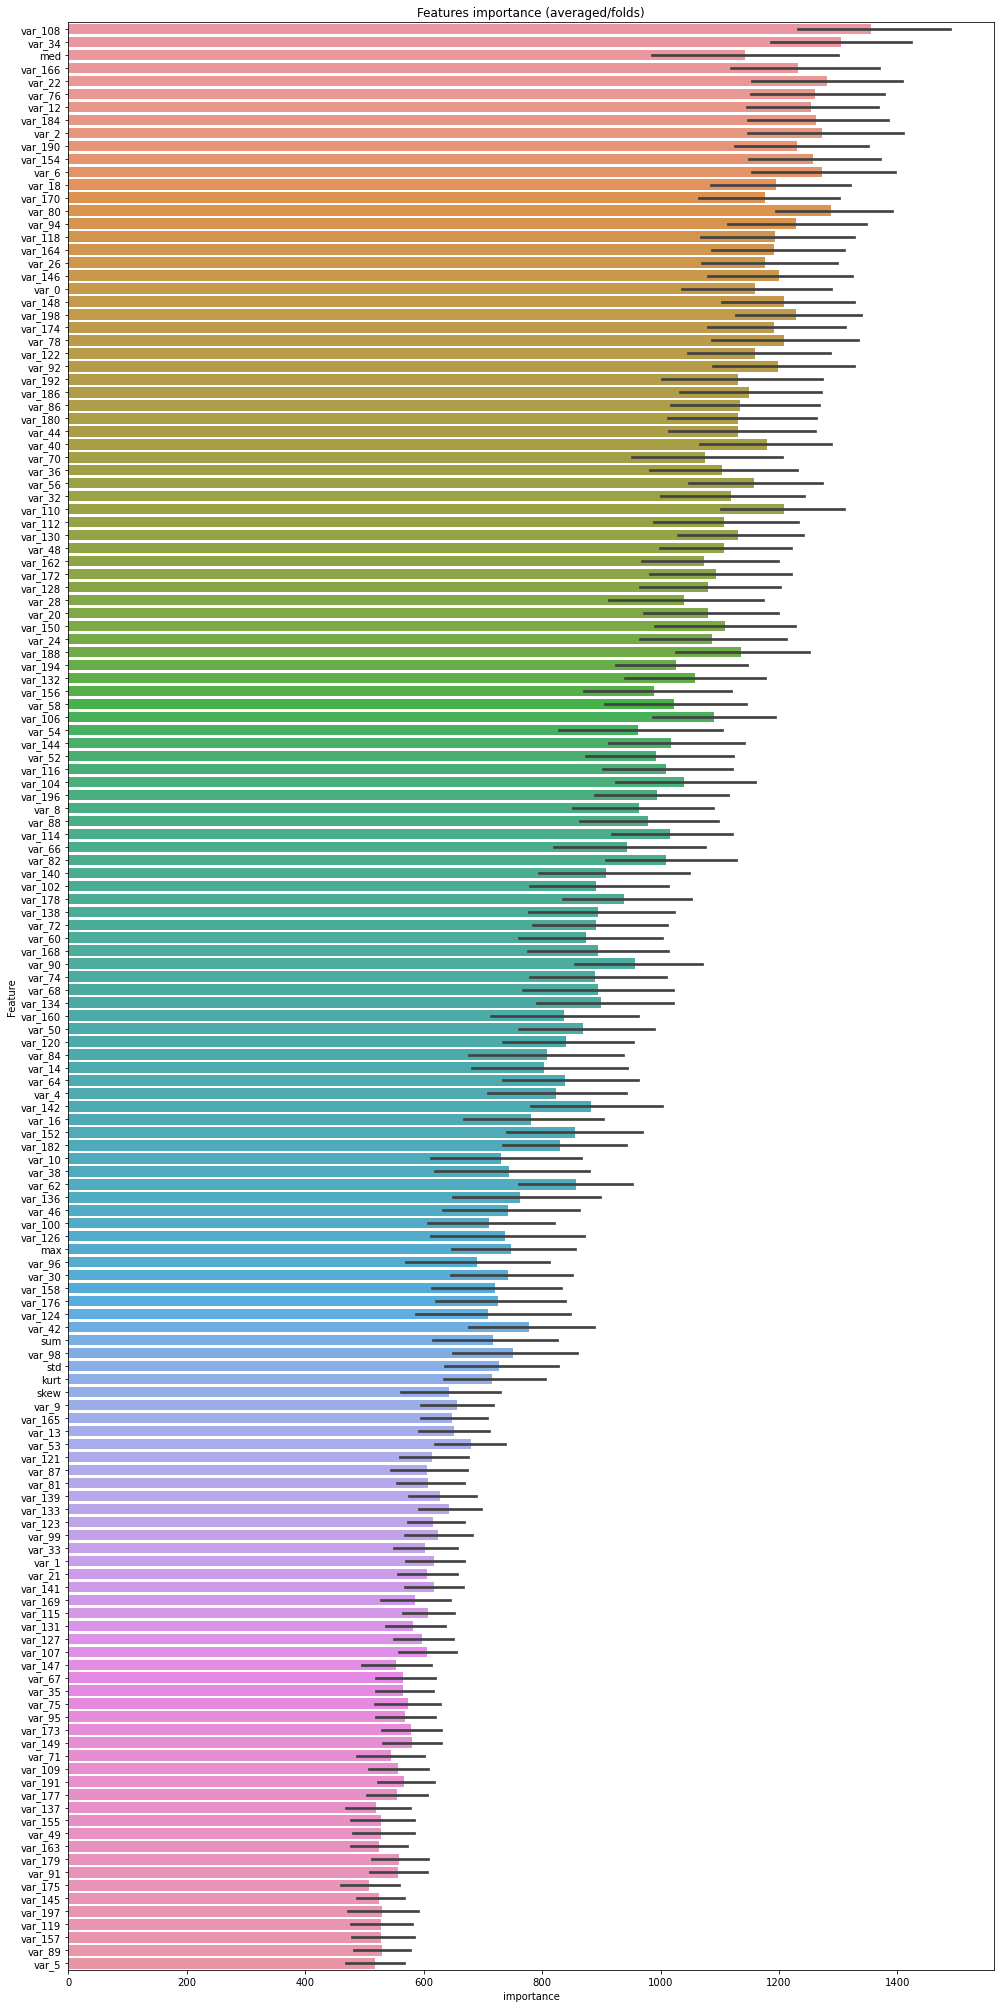

In [40]:
# Generate feature importance plot

cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)

best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()

In [41]:
# Prepare submission csv

sub_df = pd.read_csv('test.csv')
sub_df = sub_df['ID_code'].reset_index()
sub_df['target'] = predictions
sub_df = sub_df.drop(columns='index')
sub_df.to_csv('submission.csv', index=False)

sub_df

,ID_code,target
0,test_0,0.089660
1,test_1,0.176858
2,test_2,0.187899
3,test_3,0.240819
4,test_4,0.042098
...,...,...
199995,test_199995,0.032542
199996,test_199996,0.008480
199997,test_199997,0.004505
199998,test_199998,0.097548
